# Линейная и логистическая регрессия

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.special import expit

In [37]:
df = pd.read_csv("datasets/fifa_players.csv")
df= df.drop(columns=['positions'])
df

,name,full_name,birth_date,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,Argentina,94,94,110500000.0,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,Denmark,88,89,69500000.0,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,France,88,91,73000000.0,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,Italy,88,88,62000000.0,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,Senegal,88,91,60000000.0,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,Scotland,67,70,975000.0,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,Slovakia,59,67,190000.0,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,Netherlands,59,67,170000.0,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,Saudi Arabia,59,71,280000.0,...,58,38,15,54,52,50,53,16,18,17


In [38]:
df['potential_result'] = pd.cut(df['potential'], bins=[0, 85, 100], labels=[0, 1]).astype(int)
df = df.select_dtypes(include=np.number)
df = df.dropna()
df

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential_result
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,48,22,94,94,75,96,33,28,26,1
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,46,56,84,91,67,88,59,57,22,1
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,78,64,82,88,82,87,63,67,67,1
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,34,26,83,87,61,83,51,24,22,1
5,27,193.04,92.1,88,90,59500000.0,215000.0,3,3,2,...,82,88,41,60,62,87,90,89,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,91,91,93000000.0,340000.0,4,4,4,...,54,41,87,89,86,91,34,27,22,1
17941,27,154.94,69.9,91,92,102000000.0,355000.0,4,5,4,...,76,61,87,94,79,90,68,58,51,1
17942,28,193.04,76.2,91,93,72000000.0,260000.0,4,3,1,...,38,30,12,68,40,70,25,21,13,1
17943,27,175.26,68.0,92,92,108000000.0,290000.0,5,5,5,...,56,36,89,88,81,94,27,24,33,1


In [39]:
df = df.drop('potential', axis=1) 
X = df.drop('potential_result', axis=1)
X

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,84,34,26,83,87,61,83,51,24,22
5,27,193.04,92.1,88,90,59500000.0,215000.0,3,3,2,...,64,82,88,41,60,62,87,90,89,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,91,91,93000000.0,340000.0,4,4,4,...,80,54,41,87,89,86,91,34,27,22
17941,27,154.94,69.9,91,92,102000000.0,355000.0,4,5,4,...,91,76,61,87,94,79,90,68,58,51
17942,28,193.04,76.2,91,93,72000000.0,260000.0,4,3,1,...,12,38,30,12,68,40,70,25,21,13
17943,27,175.26,68.0,92,92,108000000.0,290000.0,5,5,5,...,82,56,36,89,88,81,94,27,24,33


In [40]:
y = df.potential_result
y

0        1
1        1
2        1
3        1
5        1
        ..
17940    1
17941    1
17942    1
17943    1
17944    1
Name: potential_result, Length: 789, dtype: int64

#### Подключаем функцию для разделения данных и отдаем 30% на тест, остальное на обучение

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test 

17766    0
14919    0
2053     0
16454    0
17298    0
        ..
16728    0
17768    0
17888    1
17913    1
17856    0
Name: potential_result, Length: 237, dtype: int64

#### Создаем модель линейной регресии и обучаем ее

In [42]:
lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=-0.8519 
Множители a=  [ 1.38697661e-02  4.21247754e-04  2.06108622e-03 -4.51962262e-02
  3.55207187e-02  1.14279517e-08 -9.14597567e-08 -4.01330156e-04
 -4.99306718e-04 -3.66770817e-02  3.46652424e-09  6.40278493e-03
 -5.65755292e-04  8.93602457e-05  2.22783426e-03 -9.75090185e-05
 -3.97724804e-03 -1.36422221e-03  4.26290324e-03  5.15855014e-04
 -1.03613385e-03  8.68696738e-04  7.05375995e-04 -2.32575456e-04
  3.31604206e-03 -6.94432053e-04  3.99047656e-03  4.10606602e-04
  8.06794308e-04  1.23319333e-03 -2.91919238e-03 -1.65039963e-03
  1.59598300e-03 -1.35640580e-03  3.79304602e-03 -3.54417202e-03
  6.84134853e-04 -2.76124372e-03  1.99609695e-03 -9.23459676e-07
  2.70221251e-03 -3.56347851e-03]


Множители представлены в векторе коэфициентов.

#### Рассчитываем выходы модели на тестовых данных и считаем ошибку

In [43]:
y_predicted = lin_clf.predict(X_test)
score=lin_clf.score(X_test,y_test)
print(score)#

0.5581296774846302


Значение 0.59 указывает на относительно высокую точность модели на тестовых данных.

In [44]:
X_test

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
17766,27,172.72,67.1,82,83,20500000.0,73000.0,3,3,4,...,82,79,79,82,76,76,80,76,79,78
14919,23,154.94,73.0,71,79,3500000.0,5000.0,1,4,3,...,68,55,49,68,66,58,69,47,49,52
2053,27,152.40,71.2,68,71,925000.0,7000.0,1,2,3,...,64,82,67,59,67,54,59,68,65,62
16454,30,154.94,78.9,74,74,4400000.0,18000.0,1,3,2,...,31,72,72,44,49,52,73,75,73,76
17298,22,175.26,73.0,77,85,13000000.0,45000.0,1,4,4,...,73,56,45,69,81,74,76,37,40,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16728,27,175.26,72.1,75,75,7000000.0,18000.0,1,3,3,...,73,43,38,76,77,76,67,16,32,44
17768,26,190.50,84.8,82,84,22500000.0,110000.0,2,3,2,...,44,88,80,39,57,40,72,82,85,82
17888,27,187.96,83.0,85,86,36500000.0,96000.0,3,2,2,...,12,86,86,25,22,26,82,87,87,89
17913,24,175.26,69.9,86,88,45000000.0,100000.0,3,4,3,...,69,79,80,80,79,44,82,75,81,79


#### Задаем номер измерения для построения, строим желаемые выходы и рассчитанные
Желаемые значения обозначим черными точками, а предсказанные синими.

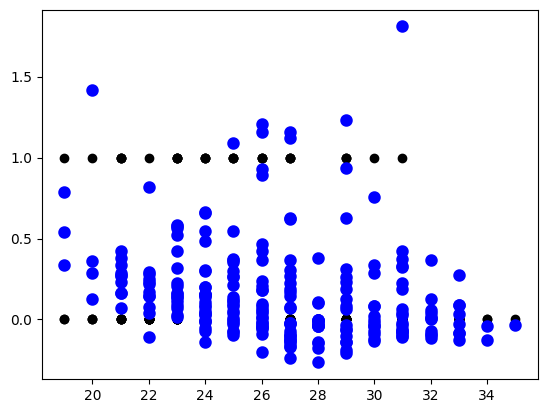

In [47]:
i=0
plt.scatter(X_test.iloc[:,i], y_test,  color='black')
plt.scatter(X_test.iloc[:,i], y_predicted, color='blue', linewidth=3)

In [48]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>1]=1
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

0.9535864978902954

Этот код выполняет бинарную классификацию, округляя предсказанные значения (y_predicted) до ближайшего целого числа с использованием np.rint(). Затем значения класса ограничиваются между 0 и 1, и преобразуются в целочисленный тип. Оценка точности классификации вычисляется сравнением предсказанных классов (y_pred_class) с фактическими классами (y_test). Результат score представляет собой долю правильных предсказаний.

In [52]:
#### Создаем матрицу неточности

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

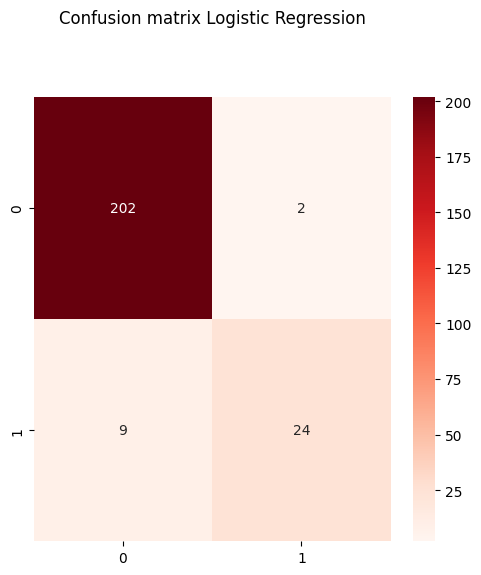

In [53]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_pred_class)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

Матрица неточности сравнивает фактические классы (y_test) с предсказанными классами (y_pred_class). Тепловая карта с использованием sns.heatmap обозначает значения матрицы с цветами, где яркий цвет указывает на более высокие значения.

In [56]:
precision, recall, thresholds = roc_curve(y_test.ravel(), y_predicted.ravel())
precision, recall, thresholds

(array([0.        , 0.        , 0.        , 0.00490196, 0.00490196,
        0.00980392, 0.00980392, 0.01960784, 0.01960784, 0.02941176,
        0.02941176, 0.03431373, 0.03431373, 0.03921569, 0.03921569,
        0.06372549, 0.06372549, 0.10784314, 0.10784314, 1.        ]),
 array([0.        , 0.03030303, 0.54545455, 0.54545455, 0.6969697 ,
        0.6969697 , 0.75757576, 0.75757576, 0.81818182, 0.81818182,
        0.84848485, 0.84848485, 0.87878788, 0.87878788, 0.93939394,
        0.93939394, 0.96969697, 0.96969697, 1.        , 1.        ]),
 array([        inf,  1.81007646,  0.62492529,  0.61775878,  0.54476577,
         0.53732561,  0.48617908,  0.42303836,  0.42002826,  0.37901113,
         0.377198  ,  0.3723367 ,  0.37202114,  0.36981444,  0.36601687,
         0.33478152,  0.33343005,  0.2959263 ,  0.28970708, -0.2659742 ]))

recision (точность): Значения, перечисленные в первом массиве, представляют точность для различных порогов. Н Рассчитывается как отношение истинных положительных случаев к общему числу предсказанных положительных случаев.

recall  (полнота): Значения, перечисленные во втором массиве, представляют полноту для соответствующих порогов.  Рассчитывается как отношение истинных положительных случаев к общему числу фактических положительных случаев.

thresholds (пороги): Представляют собой значения, используемые для разделения классов. Кривая точность-полнота строится для различных порогов.


#### ROC - анализ
Определим долю ложноположительных результатов и верноположительных результатов

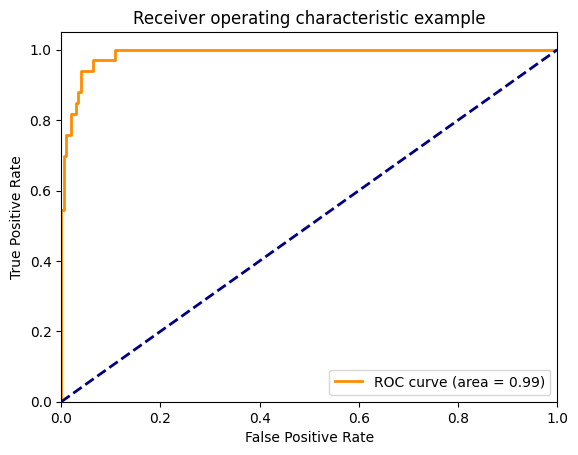

In [59]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Пунктирная линия соответствует случайному классификатору, а кривая ROC стремится к верхнему левому углу графика. Площадь под кривой измеряет общую производительность классификатора: чем ближе к 1, тем лучше.

# Логистическая регрессия

In [63]:
data = df
X = data.drop('potential_result', axis=1)
y = data.potential_result
data

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential_result
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,48,22,94,94,75,96,33,28,26,1
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,46,56,84,91,67,88,59,57,22,1
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,78,64,82,88,82,87,63,67,67,1
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,34,26,83,87,61,83,51,24,22,1
5,27,193.04,92.1,88,90,59500000.0,215000.0,3,3,2,...,82,88,41,60,62,87,90,89,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,91,91,93000000.0,340000.0,4,4,4,...,54,41,87,89,86,91,34,27,22,1
17941,27,154.94,69.9,91,92,102000000.0,355000.0,4,5,4,...,76,61,87,94,79,90,68,58,51,1
17942,28,193.04,76.2,91,93,72000000.0,260000.0,4,3,1,...,38,30,12,68,40,70,25,21,13,1
17943,27,175.26,68.0,92,92,108000000.0,290000.0,5,5,5,...,56,36,89,88,81,94,27,24,33,1


#### Разбиваем выборку на обучающую и тестовую

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

#### Hастройка параметров модели

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
y_scor=model.fit(X_train_scaled, y_train)
y_score=y_scor.predict(X_test_scaled)

#### Оценка точности модели

In [69]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       338
           1       0.91      0.88      0.89        57

    accuracy                           0.97       395
   macro avg       0.94      0.93      0.94       395
weighted avg       0.97      0.97      0.97       395



Предоставляет метрики точности (precision), полноты (recall) и F1-меры для каждого класса (0 и 1), а также средние значения по всем классам.

Precision: Доля правильно предсказанных положительных случаев от общего числа предсказанных положтельных случаев. Recall: Доля правильно предсказанных положительных случаев от общего числа фактических положительных случаев. F1-Score: среднее гармоническое между точностью и полнотой. 
Интерпретации 
    
Для класса 0: модель достаточно хорошо предсказывает, но с небольшим превышением false positiv
    
Для класса 1: аналогичная ситуация, но с небольшим превышением false negativ
    
Модель имеет точность около 99%, что указывает на её высокую эффективность в данной задаче классификации.

#### Матрица неточности

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

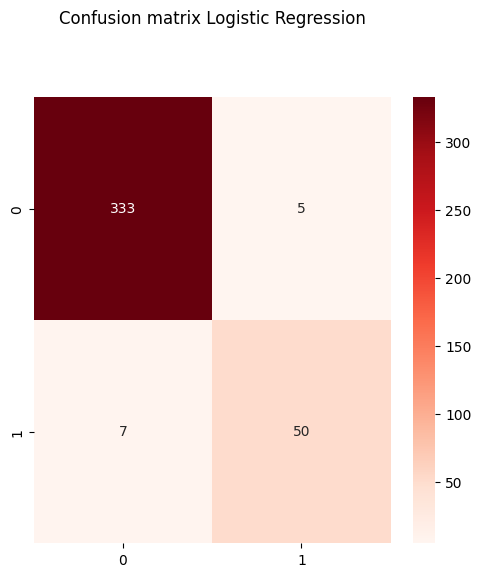

In [70]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

 Построение и визуализации матрицы неточности (confusion matrix) для модели логистической регрессии. Матрица неточности позволяет оценить производительность классификации, отображая количество верно и неверно классифицированных примеров.
 
 • True Positive (TP): Количество правильно предсказанных положительных случаев.
 
 • True Negative (TN): Количество правильно предсказанных отрицательных случаев.
 
 • False Positive (FP): Количество неверно предсказанных положительных случаев.
 
 • False Negative (FN): Количество неверно предсказанных отрицательных случели.

In [71]:
precision, recall, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
precision, recall, thresholds

(array([0.       , 0.0147929, 1.       ]),
 array([0.        , 0.87719298, 1.        ]),
 array([inf,  1.,  0.]))

Эти массивы представляют значения точности, полноты и порогов для построения кривой ROC.

 • Precision (точность): Принимает значения 0.0, 0.0147929 и 1.0 для различных порогов.
 
 • Recall (полнота): Принимает значения 0.0, 0.87719298 и 1.0 для соответствующих порогов.
 
 • Thresholds (пороги): Используются для разделения классов и принимают значения бесконечность (inf), 1.0 и 0.0.
 

In [72]:
f1_score(y_test, y_score)

0.8928571428571428

0.893 это число отражает баланс между точностью и полнотой, предоставляя обобщенную оценку эффективности модели в задачах бинарной классификации.

#### ROC - анализ

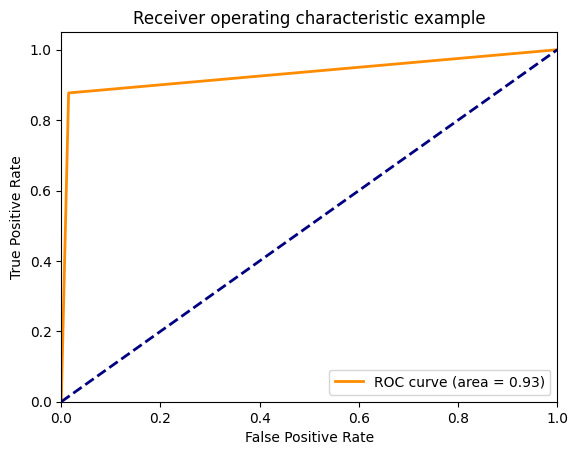

In [73]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Чем ближе значение AUC-ROC к 1, тем лучше производительность модели

In [74]:
X_cut = X[['overall_rating', 'positioning', 'composure', 'aggression']]
X_cut

,overall_rating,positioning,composure,aggression
0,94,94,96,48
1,88,84,88,46
2,88,82,87,78
3,88,83,83,34
5,88,41,87,82
...,...,...,...,...
17940,91,87,91,54
17941,91,87,90,76
17942,91,12,70,38
17943,92,89,94,56


#### Разбиваем выборку на обучающую и тестовую

In [75]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0)

#### Настройка параметров модели

In [79]:
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

model = LogisticRegression()
yc_scor=model.fit(Xc_train_scaled, yc_train)
yc_score=yc_scor.predict(Xc_test_scaled)

print(classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.78      0.67      0.72        57

    accuracy                           0.92       395
   macro avg       0.86      0.82      0.84       395
weighted avg       0.92      0.92      0.92       395



#### Матрица неточности

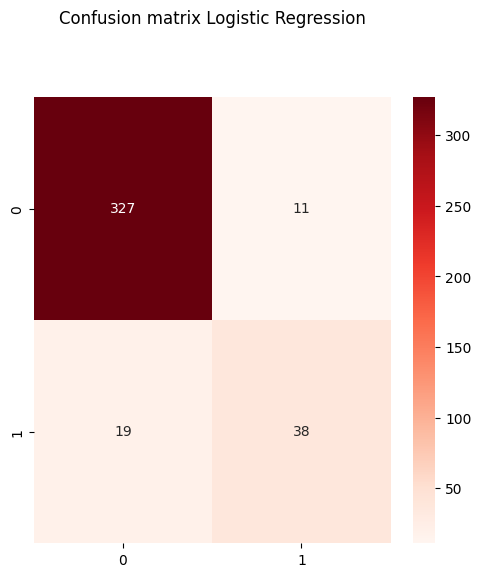

In [80]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

#### ROC - анализ

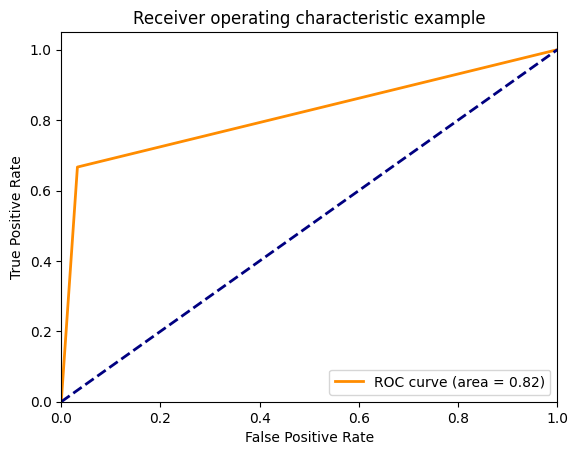

In [81]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()